# Freshwater discharge in southeast Greenland fjords

## Purpose
This notebook generates figures and spreadsheets of freshwater discharge for each fjord in the study. The figures show freshwater discharge (from both MAR and RACMO) derived from ice basins, from land basins, and from combined ice+land basins. The spreadsheets describe the cumulative, mean, and seasonal freshwater discharge in each fjord.

## Requirements
If you are generating your own discharge data (rather than using that in `./fjord_discharge`), you'll need to have the following repository installed in this same folder: https://github.com/GEUS-Glaciology-and-Climate/freshwater. This should include a folder, `./freshwater`, containing `/ice` and `/land`, which each contain `/runoff` which contains MAR/RACMO data.

## Generating discharge data
_Note: We used v2.1 of the freshwater discharge data archived at https://doi.org/10.22008/FK2/AA6MTB. As of the publication of this repository, the data have been updated to v3 and users should use v3 if they are generating their own data. Some updates to this notebook may be required to run v3 data._

Prior to using this notebook, discharge data were accessed using the following in the command line (I had to SSH into the APL server to make this work):

`python3 ./discharge.py --base ./freshwater --roi=/path/to/file.kml -d >file_output.txt`

This will use the discharge.py script to access data under `/freshwater` and get discharge (`-d`) summed over basins within the ROI. The `/path/to/file.kml` are the buffered fjord boundaries, located at `./buffered_fjords`. You can also explicitly list coordinates ("lon,lat lon,lat lon,lat") as the ROI. The `file_output.txt` go to `./fjord_discharge/Fjord_#_discharge.txt`. Each KML represents a fjord + 500m buffer zone around the fjord. KMLs were created by Ben Cohen (as KMZs, needed to be unzipped).

After creating discharge txt files for each fjord, `*_land` and `*_ice` were summed together to create `*_total` (* = MAR or RACMO) and the output was saved to a new file.
The code to sum `*_land` and `*_ice` together is the commented-out cell below the imports.

## Output
- Figures of freshwater discharge from MAR and RACMO in ice basins, land basins, and combined, for each fjord \
`../figures/fjord_FWdischarge/fjord##_FWdischarge.png`
- Spreadsheets of cumulative discharge, mean discharge, and seasonal discharge for each fjord \
`../databases/fjord_FWdischarge_cumulative.csv` \
`../databases/fjord_FWdischarge_mean.csv` \
`../databases/fjord_FWdischarge_seasonal.csv`

## Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [2]:
# INTERMEDIATE CODE: SUM *_LAND AND *_ICE TO CREATE *_TOTAL AND SAVE AS NEW FILE

# fjord_number_list = list(range(1,53))
# for fjord_number in fjord_number_list:
#     fjord_discharge = pd.read_csv(f'./fjord_discharge/Fjord_{fjord_number}_discharge.txt').set_index('time')
#     fjord_discharge.index = pd.to_datetime(fjord_discharge.index)
#     if ('MAR_ice' in fjord_discharge.keys()) & ('MAR_land' in fjord_discharge.keys()):
#         fjord_discharge['MAR_total'] = fjord_discharge['MAR_land'] + fjord_discharge['MAR_ice']
#     elif ('MAR_ice' in fjord_discharge.keys()) & ('MAR_land' not in fjord_discharge.keys()):
#         fjord_discharge['MAR_total'] = fjord_discharge['MAR_ice']
#     elif ('MAR_ice' not in fjord_discharge.keys()) & ('MAR_land' in fjord_discharge.keys()):
#         fjord_discharge['MAR_total'] = fjord_discharge['MAR_land']
#     if ('RACMO_ice' in fjord_discharge.keys()) & ('RACMO_land' in fjord_discharge.keys()):
#         fjord_discharge['RACMO_total'] = fjord_discharge['RACMO_land'] + fjord_discharge['RACMO_ice']
#     elif ('RACMO_ice' in fjord_discharge.keys()) & ('RACMO_land' not in fjord_discharge.keys()):
#         fjord_discharge['RACMO_total'] = fjord_discharge['RACMO_ice']
#     elif ('RACMO_ice' not in fjord_discharge.keys()) & ('RACMO_land' in fjord_discharge.keys()):
#         fjord_discharge['RACMO_total'] = fjord_discharge['RACMO_land']
#     fjord_discharge.to_csv(f'./fjord_discharge/Fjord_{fjord_number}_discharge_total.txt')

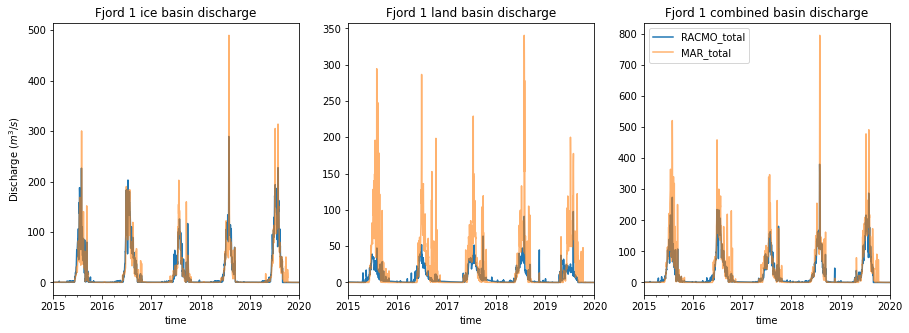

In [3]:
# Example plot of freshwater discharge for a single fjord

# priority fjord numbers: 15, 18, 31, 37, 40, 43, 45, 48
fjord_number = 1
fjord_discharge = pd.read_csv(f'./fjord_discharge/Fjord_{fjord_number}_discharge_total.txt').set_index('time')
fjord_discharge.index = pd.to_datetime(fjord_discharge.index)
fjord_discharge

# Initialize axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

# Plot discharge from ice basins
if ('RACMO_ice' in fjord_discharge.keys()) & ('MAR_ice' in fjord_discharge.keys()):
    fjord_discharge['RACMO_ice'].plot(ax=axs[0], label='RACMO')
    fjord_discharge['MAR_ice'].plot(ax=axs[0], alpha=0.6, label='MAR')
axs[0].set_ylabel('Discharge ($m^3/s$)')
axs[0].set_title(f'Fjord {fjord_number} ice basin discharge')
axs[0].set_xlim(pd.to_datetime(['2015-01-01', '2020-01-01']))

# Plot discharge from land basins
if ('RACMO_land' in fjord_discharge.keys()) & ('MAR_land' in fjord_discharge.keys()):
    fjord_discharge['RACMO_land'].plot(ax=axs[1])
    fjord_discharge['MAR_land'].plot(ax=axs[1], alpha=0.6)
axs[1].set_title(f'Fjord {fjord_number} land basin discharge')
axs[1].set_xlim(pd.to_datetime(['2015-01-01', '2020-01-01']))

# Plot combined discharge
fjord_discharge['RACMO_total'].plot(ax=axs[2])
fjord_discharge['MAR_total'].plot(ax=axs[2], alpha=0.6)
axs[2].set_title(f'Fjord {fjord_number} combined basin discharge')
axs[2].set_xlim(pd.to_datetime(['2015-01-01', '2020-01-01']))
axs[2].legend()

plt.show()

In [5]:
# Create plots of freshwater discharge from MAR and RACMO in ice basins, land basins, and combined, for each fjord

fjord_number_list = list(range(1,53))

for fjord_number in fjord_number_list:
    # get fjord data
    fjord_discharge = pd.read_csv(f'./fjord_discharge/Fjord_{fjord_number}_discharge_total.txt').set_index('time')
    fjord_discharge.index = pd.to_datetime(fjord_discharge.index)

    # initialize plot
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axs = axs.flatten()

    # Plot discharge from ice basins
    if ('RACMO_ice' in fjord_discharge.keys()) & ('MAR_ice' in fjord_discharge.keys()):
        fjord_discharge['RACMO_ice'].plot(ax=axs[0], label='RACMO')
        fjord_discharge['MAR_ice'].plot(ax=axs[0], alpha=0.6, label='MAR')
    axs[0].set_ylabel('Discharge ($m^3/s$)')
    axs[0].set_title(f'Fjord {fjord_number} ice basin discharge')
    axs[0].set_xlim(pd.to_datetime(['2015-01-01', '2020-01-01']))

    # Plot discharge from land basins
    if ('RACMO_land' in fjord_discharge.keys()) & ('MAR_land' in fjord_discharge.keys()):
        fjord_discharge['RACMO_land'].plot(ax=axs[1])
        fjord_discharge['MAR_land'].plot(ax=axs[1], alpha=0.6)
    axs[1].set_title(f'Fjord {fjord_number} land basin discharge')
    axs[1].set_xlim(pd.to_datetime(['2015-01-01', '2020-01-01']))

    # Plot combined discharge
    fjord_discharge['RACMO_total'].plot(ax=axs[2])
    fjord_discharge['MAR_total'].plot(ax=axs[2], alpha=0.6)
    axs[2].set_title(f'Fjord {fjord_number} combined basin discharge')
    axs[2].set_xlim(pd.to_datetime(['2015-01-01', '2020-01-01']))
    axs[2].legend()

    # save output
    pathlib.Path('../figures/fjord_FWdischarge/').mkdir(parents=True, exist_ok=True)
    plt.savefig(f'../figures/fjord_FWdischarge/fjord{fjord_number:02}_FWdischarge.png', bbox_inches='tight', dpi=300)
    plt.close()

In [ ]:
# Create spreadsheets of cumulative discharge, mean discharge, and seasonal discharge for each fjord

fjord_number_list = list(range(1,53))
cumulative_fjord_discharge = pd.DataFrame(
    index=fjord_number_list, 
    columns=['MAR_land', 'MAR_ice', 'MAR_total', 'RACMO_land', 'RACMO_ice', 'RACMO_total'])
mean_fjord_discharge = pd.DataFrame(
    index=fjord_number_list, 
    columns=['MAR_land', 'MAR_ice', 'MAR_total', 'RACMO_land', 'RACMO_ice', 'RACMO_total'])
seasonal_fjord_discharge = pd.DataFrame(
    index=fjord_number_list, 
    columns=['WIN_MAR_total', 'SPR_MAR_total', 'SUM_MAR_total', 'AUT_MAR_total', 'WIN_RACMO_total', 'SPR_RACMO_total', 'SUM_RACMO_total', 'AUT_RACMO_total'])

def get_season(date):
    if date.month in [1, 2]:
        season = 'WIN'
    elif date.month in [3, 4, 5]:
        season = 'SPR'
    elif date.month in [6, 7, 8]:
        season = 'SUM'
    elif date.month in [9, 10, 11]:
        season = 'AUT'
    elif date.month in [12]:
        season = 'WIN'
    return season

for fjord_number in fjord_number_list:
    # get fjord data
    fjord_discharge = pd.read_csv(f'./fjord_discharge/Fjord_{fjord_number}_discharge_total.txt').set_index('time')
    fjord_discharge.index = pd.to_datetime(fjord_discharge.index)

    # convert m3/s to m3/day
    fjord_discharge_daily = fjord_discharge * 86400
    
    # sum daily fjord data (m3) over entire time series to get cumulative discharge from fjord and add it to summary dataframe
    fjord_discharge_sum = fjord_discharge_daily.sum()
    cumulative_fjord_discharge.loc[fjord_number] = fjord_discharge_sum

    # get average discharge (m3/s) from fjord and add it to summary dataframe
    fjord_discharge_mean = fjord_discharge.mean()
    mean_fjord_discharge.loc[fjord_number] = fjord_discharge_mean

    # get seasonal mean discharge (m3/s) from fjord and add it to summary dataframe
    fjord_discharge['Season'] = fjord_discharge.apply(lambda row: get_season(row.name), axis=1)
    fds = fjord_discharge.groupby('Season').mean()
    seasonal_fjord_discharge.loc[fjord_number] = [
        fds.loc['WIN']['MAR_total'], fds.loc['SPR']['MAR_total'], fds.loc['SUM']['MAR_total'], fds.loc['AUT']['MAR_total'],
        fds.loc['WIN']['RACMO_total'], fds.loc['SPR']['RACMO_total'], fds.loc['SUM']['RACMO_total'], fds.loc['AUT']['RACMO_total']]

# save each to CSV
pathlib.Path('../databases/').mkdir(parents=True, exist_ok=True)
cumulative_fjord_discharge.to_csv(
    '../databases/fjord_FWdischarge_cumulative.csv', 
    index_label='fjord', 
    header=['MAR_land (m3)', 'MAR_ice (m3)', 'MAR_total (m3)', 'RACMO_land (m3)', 'RACMO_ice (m3)', 'RACMO_total (m3)'])
mean_fjord_discharge.to_csv(
    '../databases/fjord_FWdischarge_mean.csv', 
    index_label='fjord', 
    header=['MAR_land (m3/s)', 'MAR_ice (m3/s)', 'MAR_total (m3/s)', 'RACMO_land (m3/s)', 'RACMO_ice (m3/s)', 'RACMO_total (m3/s)'])
seasonal_fjord_discharge.to_csv(
    '../databases/fjord_FWdischarge_seasonal.csv', 
    index_label='fjord', 
    header=['MAR_WIN (m3/s)', 'MAR_SPR (m3/s)', 'MAR_SUM (m3/s)', 'MAR_AUT (m3/s)', 'RACMO_WIN (m3/s)', 'RACMO_SPR (m3/s)', 'RACMO_SUM (m3/s)', 'RACMO_AUT (m3/s)'])
